In [1]:
#load libraries
from matplotlib import pyplot as plt 
import numpy as np

# Exercise 3.6. 
Replot Figure 3.3 for a laser beam incidence angle of 30° instead of
20°. Does maximum resonance absorption for 30° incidence angle occur at larger
or smaller dimensionless density-gradient scale length? By how much?

Text(4.5, 0.1, '$\\Delta k_0L=$8.59')

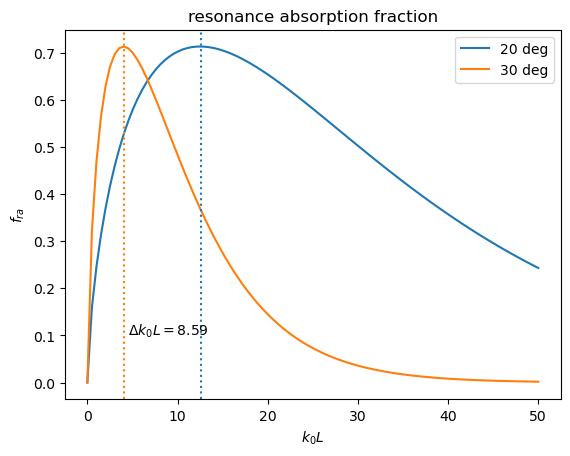

In [34]:
def fra(x,theta_deg):
    theta=theta_deg*np.pi/180
    tau=(x)**(1/3)*np.sin(theta)
    phi=2.1*tau*np.exp(-2/3*tau**3)
    return 1/2*phi**2

x=np.linspace(0,50,100) #define x-scale
plt.plot(x,fra(x,20),label='20 deg')
plt.plot(x,fra(x,30),label='30 deg')
plt.xlabel(r'$k_0L$')
plt.ylabel(r'$f_{ra}$')
plt.legend()
plt.title('resonance absorption fraction')

index_min_20 = np.argmax(fra(x,20)) #find 
index_min_30 = np.argmax(fra(x,30))

plt.axvline(x=x[index_min_20],linestyle='dotted')
plt.axvline(x=x[index_min_30],linestyle='dotted',color='tab:orange')

plt.text(s=r'$\Delta k_0L=$'+str(np.round(np.abs(x[index_min_30]-x[index_min_20]),2)),x=4.5,y=0.1)

For 30 deg incidence, the maximum resonance absorption occurs at smaller dimensionless density-gradient scale that at 20 degrees. Specifically, by about 8.6 units.

# Exercise 3.10. 
The index of refraction of the vacuum (free space) is n = 1; for a
dielectric it is n > 1; for collisionless plasma it is n < 1. Whereas a laser beam
obliquely entering a dielectric bends toward the normal to the surface, a laser beam
obliquely entering collisionless plasma bends away from the normal to the surface.
How might we use the refractive properties of plasma to design a “plasma mirror”
that will bend the beam back in the direction from whence it came?

We can make use of the right combination of the light frequency, incidence angle and polarization, and the plasma's density. Assuming that Snell's law holds for vacuum-plasma boundary, we have $n_{vacuum}\sin(\theta)=n_{plasma}\sin(\beta)$. For reflection, we require $\beta>\pi/2$. Since $n_{vacuum}=1$, the reflection just occurs when 

\begin{equation}
    n=n_{plasma}=\sqrt{1-\frac{\omega_p^2}{\omega^2}}=\sin(\theta)
\end{equation}

where $\omega$ is the light frequency, and $\omega_p=\sqrt{\frac{n_e e^2}{\epsilon_0 m_e}}$ is the density-dependent plasma frequency. 

This can be further rearranged to 
\begin{equation}
    \omega_p^2=\omega^2(1-\sin^2\theta)=\omega^2\cos^2(\theta)
\end{equation}

or 

\begin{equation}
    \omega_p=\omega \cos(\theta)
\end{equation}

This can be further reritten as $n_e=n_{cr}\cos^2(\theta)$, where $n_e$ is the electron density, and $n_{cr}$ the critical density. The light will reflect at densities lower than this.

# Exercise 4.10. 
Show that the equations of motion in cylindrical coordinates are
not invariant under linear transformation of the independent variables.

Here we use the three Navier-Stokes equations, as derived in class:

\begin{equation}
    \frac{\partial \rho}{\partial t}+\nabla \cdot(\rho \vec{u}) = 0
\end{equation}

\begin{equation}
    \frac{\partial (\rho\vec{u})}{\partial t}+\nabla \cdot(\rho \vec{u}\cdot \vec{u}) +\nabla p= 0
\end{equation}

\begin{equation}
    \frac{\partial \rho \epsilon}{\partial t}+\nabla \cdot(\rho \vec{u} \epsilon) + \nabla(p\vec{u})= 0
\end{equation}

these have very similar form. The del operator, in cartesian coordinates, can be expressed as

\begin{equation}
    \vec{\nabla}=\frac{\partial}{\partial x}+\frac{\partial}{\partial y}+\frac{\partial}{\partial z}
\end{equation}
This is invariant under the linear transformation $x\rightarrow x'=x_0+x$,$y\rightarrow y'=y_0+y$, $z\rightarrow z'=z_0+z$ since

\begin{equation}
    \vec{\nabla'}=\frac{\partial}{\partial (x_0+x)}+\frac{\partial}{\partial (y_0+y)}+\frac{\partial}{\partial (z_0+z)}=\frac{\partial}{\partial x'}+\frac{\partial}{\partial y'}+\frac{\partial}{\partial z'}
\end{equation}
has the identical form. In cylindrical coordinates, however, the divergence operation 

\begin{equation}
\nabla \cdot \vec{A}=\frac{1}{r}\frac{\partial}{\partial r}(rA_r)+\frac{1}{r}\frac{\partial}{\partial \theta}A_\theta+\frac{\partial}{\partial z}A_z
\end{equation}

is not invariant under the linear operations $r\rightarrow r'=r_0+r$, $\theta\rightarrow \theta'=\theta_0+\theta$, $z\rightarrow z'=z_0+z$ because the independent variables appear outside the derivatives.

# Exercise 4.18. 
Consider one-tenth-solid density Al plasma flowing past one-tenth-solid density Fe plasma at relative velocity 10^6 cm s–1. What is the classical Kelvin–Helmholtz growth rate of a 1-μm amplitude, 20-μm wavelength sinusoidal perturbation on the interface between these two plasmas? How much time passes before the perturbation growth starts to become non-linear?

An initial perturbation will grow in the direction perpendicular to the plane of unperturbed boundary as:

\begin{equation}
    \eta_z(t)\simeq \eta_0 e^{\gamma t}
\end{equation}
where
\begin{equation}
    \gamma=\frac{2\pi}{\lambda}\Delta u \frac{\sqrt{\rho_1 \rho_2}}{\rho_1+\rho_2}
\end{equation}

where $\lambda$ is the wavelength of the initial perturbation, $\Delta u$ is the relative velocity of the layers, and $\rho_i$ is the density of the respective layers. Here we have $\rho_{Al plasma}=\rho_1=271$ kg/m^3 and $\rho_{Fe plasma}=\rho_2=784$ kg/m^3

In [66]:
lambda_pert=20e-6 #20um perturbation wavelength
delta_u=1e4 #10^6 cm/s relative velocity
rho1=271 #density of Al plasma (kg/m^3)
rho2=784 #density of Fe plasma (kg/m^3)
eta_0=1e-6 #1um initial perturbation
gamma=2*np.pi/lambda_pert*delta_u*np.sqrt(rho1*rho2)/(rho1+rho2)
print('The growth rate is approximately {:.2g} s^-1'.format(gamma))

The growth rate is approximately 1.4e+09 s^-1


the above relations are only valid as long as $\eta<\lambda$, meaning that the perturbation amplitude is comparable in size to the perturbation wavelength. To get the overall time $\tau$ for which this linear approximation is valid, we can use

\begin{equation}
    \eta\simeq \lambda =\eta_0e^{\gamma \tau} \implies \tau\simeq\frac{1}{\gamma}\ln\left(\frac{\lambda}{\eta_0}\right)
\end{equation}

In [68]:
tau=1/gamma*np.log(lambda_pert/eta_0)
print('The time over which the perturbation growth remains approximately linear is {:.2g} s'.format(tau))

The time over which the perturbation growth remains approximately linear is 2.2e-09 s


# Exercise 5.6. 
Derive equation (5.39):
\begin{equation}
    P=P_0+\rho_0 u_0^2\sin^2(\theta)\left[1-\frac{\tan(\theta-\alpha)}{\tan(\theta)}\right]
\end{equation}

# Exercise5.9. 
What is the change in entropy across a 1-Mbar shock in STP diatomic deuterium gas, including molecular vibrational modes in the adiabatic index?

We can use the equation 5.46 relating these quantities:
\begin{equation}
\Delta S=C_V \ln\left[\frac{P_1}{P_0}\left[\frac{(\gamma-1)(P_1/P_0)+(\gamma+1)}{(\gamma+1)(P_1/P_0)+(\gamma-1)}\right]^\gamma\right]
\end{equation}

here, since we are dealing with diatomic gas including molecular vibrational modes, we have $\gamma=C_P/C_V=9/7$. Assuming STP, $P_0=1$ bar, $P_1=1$ Mbar, and $C_V=$

In [81]:
gamma_ind=9/7 #diatomic gas with vibrational modes
P0=1 #1bar initial pressure (according to the STP formulation)
P1=1e6 #1Mbar of shock pressure
C_P=5200 #specific heat capacity of gas Deuterium [J/(kg K)] at constant pressure
#(https://en.wikipedia.org/wiki/Deuterium#:~:text=Solid%3A%202950%20J%2F(kg&text=K),Gas%3A%205200%20J%2F(kg&text=K))

C_V=C_P/gamma_ind #specific isochoric heat capacity
delta_S=C_V*np.log(P1/P0*(((gamma_ind-1)*P1/P0+(gamma_ind+1))/((gamma+1)*P1/P0+(gamma_ind-1)))**gamma_ind)

print('The change in entropy is approximately {:.0f}'.format(delta_S))

The change in entropy is approximately -60046
